### 의사결정나무(DT)

-   IF-ELSE 방식의 질문에 대한 답변으로 문제를 해결하는 알고리즘
-   피쳐(특성) 중에서 선택한 기준으로 데이터 분할
    -   엔트로피 (불순정도) => 낮아지는 방향
    -   정보이득 : 1-엔트로피 = 높아지는 방향
    -   지니계수 : 불평등수치값 => 낮아지는 방향
-   단점 : 과대적합이 될 가능성 높음! 성능이 좋지 않음
-   장점 : 전처리 영향을 받지 않음 / 직관성이 높음 / 피쳐들 중 주요 피쳐 확인 가능
-   주의
    -   여기서의 주요 피쳐는 데이터 분할을 위한 주요 피쳐
    -   100% 데이터의 주요 피쳐가 아닐 수도 있음 => 다른 검사(상관계수, 시각화 등등)와 함께 평가


[1] 모듈 로딩 및 데이터 준비 <hr>


In [375]:
# 모듈 로딩
import pandas as pd


In [376]:
irisDF = pd.read_csv("../data/iris.csv")


[2] 학습용 데이터셋 준비 <hr>


[2-1] 피쳐와 타겟 분리


In [377]:
feature = irisDF[irisDF.columns[:-1]]
target = irisDF[irisDF.columns[-1]]


[2-2] 훈련용과 테스트용 데이터셋 분리


In [378]:
from sklearn.model_selection import train_test_split


In [379]:
x_train, x_test, y_train, y_test = train_test_split(
    feature, target, test_size=0.2, stratify=target, random_state=0
)


[3] 기계학습 진행 <hr>

-   타겟 데이터 확인 결과 : 3개의 분류
-   학습 유형 : 지도학습 + 분류
    -   분류 알고리즘 => KNN, LogisticRegression, SVM-SVC, DecisionTree


[3-1] 의사결정 알고리즘으로 분류


In [380]:
from sklearn.tree import DecisionTreeClassifier


In [381]:
# 인스턴스 생성 및 학습
model = DecisionTreeClassifier(criterion="entropy")
model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [382]:
# 생성된 모델 구조 시각화
from sklearn.tree import export_graphviz


In [383]:
print(
    export_graphviz(
        model,
        "iris_dt_model.dot",
        feature_names=model.feature_names_in_,
        class_names=model.classes_,
        rounded=True,
        filled=True,
    )
)


None


In [384]:
# dot 언어로 작성된 내용을 시각화 해주는 모듈
from graphviz import Source


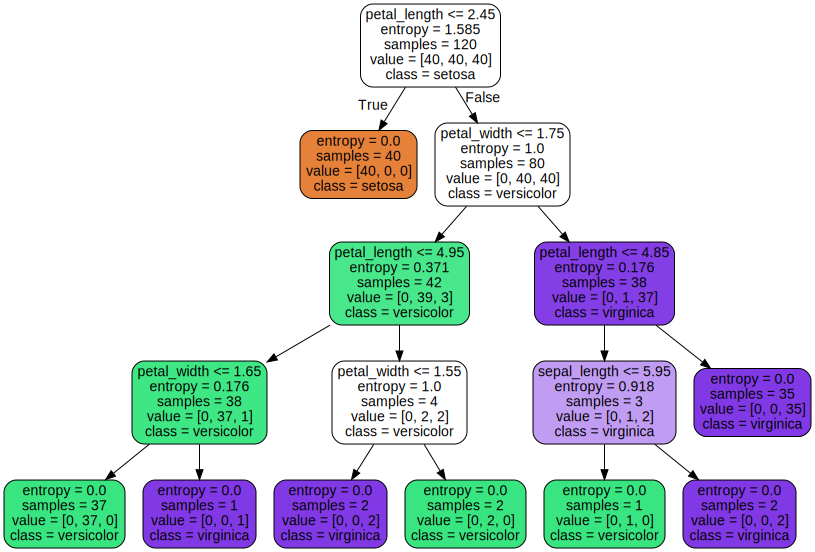

In [385]:
Source.from_file("./iris_dt_model.dot")


[4] 모델 평가 <hr>


In [386]:
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print(f"[TRAIN] {train_score} [TEST] {test_score}")


[TRAIN] 1.0 [TEST] 0.9666666666666667


[5] 문제 해결 및 성능 향상 즉, 튜닝 <hr>

-   원인 예상
    -   데이터셋 부족 => CV
    -   DT의 여러가지 하이퍼파라미터 기본값으로만 사용 => 다양한 값 조절
-   해결 방법
    -   2개의 원인을 한꺼번에 해결하기 위해서 GridSearchCV


In [387]:
# 모듈 로딩
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [388]:
# 모델 조합 조건
# cv => 기본 5, ...
# DT의 하이퍼파라미터 => max_depth, ...
dt_model = DecisionTreeClassifier()
n_cv = 5
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 4, 6],
}
# 하이퍼파라미터 조합된 모델 생성 후 교차검증 데이터셋으로 학습 진행해주는 인스턴스
gs = GridSearchCV(dt_model, param_grid=params, cv=n_cv)


In [389]:
# 조합된 모델들의 학습 진행
result = gs.fit(x_train, y_train)


In [390]:
# 결과 확인
result


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 4, 6]})

In [391]:
# 학습 후 저장된 모델 파라미터 확인
# 교차학습 결과
cv_result = pd.DataFrame(gs.cv_results_)
cv_result


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001788,0.000390,0.001191,0.000395,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.916667,0.958333,0.916667,0.958333,0.916667,0.933333,0.020412,10
1,0.001395,0.000489,0.000797,0.000399,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.916667,0.916667,0.958333,0.916667,0.933333,0.020412,10
2,0.001008,0.000029,0.000983,0.000036,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.958333,0.916667,0.916667,0.958333,0.916667,0.933333,0.020412,10
3,0.001419,0.000469,0.000461,0.000408,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.958333,0.916667,0.958333,0.916667,0.941667,0.020412,3
4,0.001525,0.002105,0.000809,0.000760,gini,10,4,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.916667,0.916667,0.958333,0.916667,0.933333,0.020412,10
5,0.001676,0.000937,0.000795,0.000398,gini,10,6,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.958333,0.916667,0.916667,0.958333,0.916667,0.933333,0.020412,10
6,0.000996,0.000008,0.000997,0.000001,gini,15,2,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.916667,0.958333,0.916667,0.958333,0.916667,0.933333,0.020412,10
7,0.001701,0.000610,0.000594,0.000485,gini,15,4,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.958333,0.916667,0.916667,0.958333,0.916667,0.933333,0.020412,10
8,0.001120,0.000511,0.001129,0.000251,gini,15,6,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.958333,0.916667,0.916667,0.958333,0.916667,0.933333,0.020412,10
9,0.002530,0.004562,0.000241,0.000482,entropy,5,2,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.958333,0.958333,0.916667,0.958333,0.916667,0.941667,0.020412,3


In [392]:
# 조합된 모델 중 최고의 성능을 내는 하이퍼파라미터 값
gs.best_params_


{'criterion': 'log_loss', 'max_depth': 5, 'min_samples_split': 2}

In [393]:
# 조합된 모델 중 최고의 성능을 내는 모델 인스턴스
my_best_model = gs.best_estimator_
my_best_model


DecisionTreeClassifier(criterion='log_loss', max_depth=5)

In [394]:
# 조합된 모델 중 최고의 점수
gs.best_score_


0.9583333333333334

[6] 학습 및 튜닝 후 모델 저장 <hr>

-   다른 파일에서 활용이 가능한 파일 형태로 저장
-   웹/앱 원하는 곳에서 활용 가능
-   scikit-learn에서는 pickle 포멧으로 저장
-   joblib 모듈에 해당 기능 포함되어 있음


In [395]:
import joblib, os


In [396]:
# 모델 저장
model_dir = "../model/"
model_filename = model_dir + "iris_dt.pkl"

# 저장 폴더 존재여부 확인 후 저장
if not os.path.exists(model_dir):
    os.makedirs(model_dir)


In [397]:
joblib.dump(my_best_model, model_filename)


['../model/iris_dt.pkl']